In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=17)

In [2]:
def update_hunger(sttate, count):
    hunger = sttate['h']
    if count > 0:
        return hunger + 1/(np.power(2, count))
    else:
        return hunger

def update_food(sstate, probability, timestep, rgen):
    cries, food = sstate['c'], sstate['f']
    if cries and not food:
        return rgen.choice([0, 1], p=[1-probability, probability])
    else:
        return 0

def eat(sstate):
    if sstate['f']:
        return {'h': 0, 'f': 1, 'c': 0, 'e': 1}
    else:
        s = sstate.copy()
        s['e'] = 1
        return s

def check_for_eat(sstate):
    if sstate['h'] > 0:
        if sstate['f'] == 1:
            if sstate['e'] == 0:
                return True
    return False

def check_for_cry(sstate, hunger_threshold):
    return sstate['h'] > hunger_threshold
        
def cry(sstate):
    s = sstate.copy()
    s['c'], s['e'] = (1, 0)
    return s

In [3]:
rng = np.random.default_rng()
state = {'h': 0, 'f': 0, 'c': 0, 'e': 0}
NUM_TIMESTEPS = 50
times = np.arange(1, 1 + NUM_TIMESTEPS)
P_FOOD = .5
HUNGER_THRESHOLD = .9
states = [state]
cries, eats = [], []
last_eaten = 0
for t in times:
    new_state = states[-1].copy()
    
    # run food independent dynamics
    new_state['f'] = update_food(new_state, P_FOOD, t, rng)
    
    # reset eating action
    new_state['e'] = 0
    
    if check_for_eat(new_state):
#         print(t, 'eats')
        new_state = eat(new_state)
        eats.append(t)
        states.append(new_state)
        last_eaten = 0
        continue
        
    last_eaten += 1
    
    # hunger independent dynamics only happen if not eating
    new_state['h'] = update_hunger(new_state, last_eaten)
    
    if check_for_cry(new_state, HUNGER_THRESHOLD):
#         print(t, 'cries')
        new_state = cry(new_state)
        cries.append(t)
        states.append(new_state)
        continue
    states.append(new_state)
del states[0]
assert len(set(cries).intersection(set(eats))) == 0

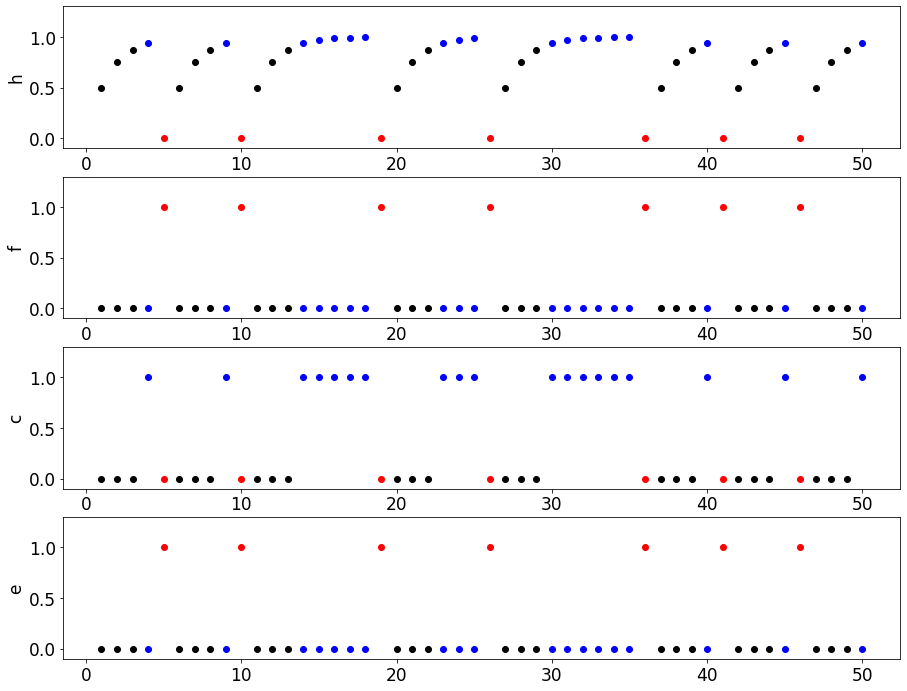

In [4]:
f, axes = plt.subplots(4, 1, figsize=(15, 12))
for ax, name in zip(axes, state.keys()):
    for ii, (t, s) in enumerate(zip(times, [d[name] for d in states])):
        if t in cries:
            c = 'blue'
        elif t in eats:
            c = 'red'
        else:
            c = 'k'
        ax.plot(t, s, 'o', color=c)
    ax.set_ylabel(name)
    ax.set_ylim([-0.1, 1.3])

In [5]:
print([d['h'] for d in states])

[0.5, 0.75, 0.875, 0.9375, 0, 0.5, 0.75, 0.875, 0.9375, 0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875, 0.99609375, 0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875, 0.99609375, 0.998046875, 0, 0.5, 0.75, 0.875, 0.9375, 0, 0.5, 0.75, 0.875, 0.9375, 0, 0.5, 0.75, 0.875, 0.9375]
